## 결정 트리 (Decision Trees)

- 결정 트리는 분류와 회귀 문제에 널리 사용하는 모델  
- 기본적으로 결정 트리는 결정에 다다르기 위해 예/아니오 질문을 이어 나가면서 학습  
- bears, hawks, penguins, dolphins 네 가지 동물을 구분한다고 가정  
- 우리의 목표는 가능한 한 적은 예/아니오 질문으로 문제를 해결하는 것  
- 날개가 있는 동물인지를 물어보면 가능성 있는 동물을 둘로 좁힐 수 있음  
- 대답이 "yes" 이면 다음엔 hawks와 penguins를 구분할 수 있는 질문을 해야 함  
- 예를 들면 날 수 있는 동물인지 물어봐야 함  
- 만약 날개가 없다면 가능한 동물은 bears, dolphins 임  
- 이 두 동물을 구분하기 위한 질문은 지느러미의 여부  

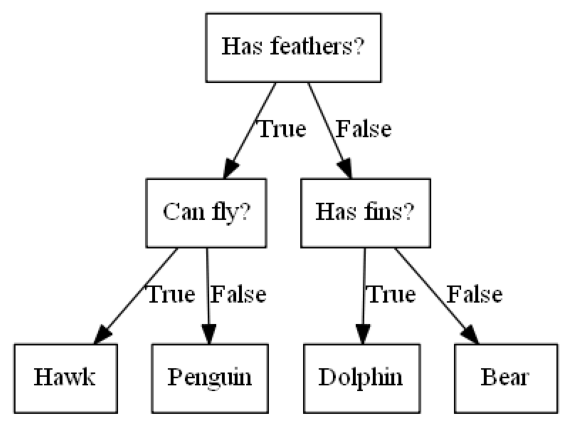

In [1]:
import mglearn
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
mglearn.plots.plot_animal_tree()
plt.show()

- 머신러닝 입장에서 말하자면, 세 개의 feature("Has feathers", "Can fly", "Has fins")를 사용해 네 개의 클래스("hwaks", "penguins", "dolphins", "bears")를 구분하는 모델을 만든 것임
- 이런 모델을 직접 만드는 대신 지도 학습 방식으로 데이터로부터 학습을 시킬 수 있음

### 결정트리 (Decision Tree) 만들기
- 마지막 노드를 leaf node 라고 함
- 타깃 하나로 이루어진 leaf node 를 순수 노드(pure node) 라고 함

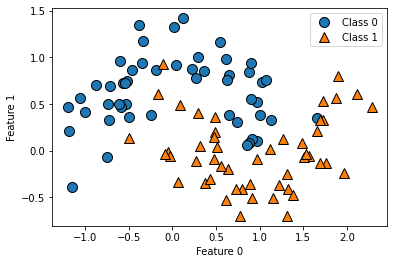

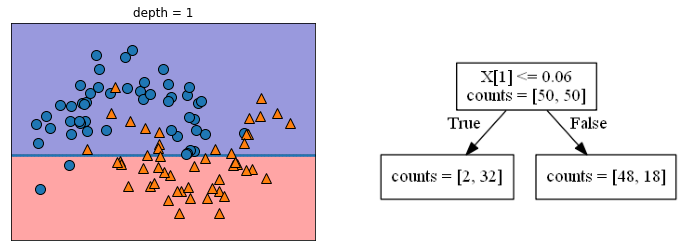

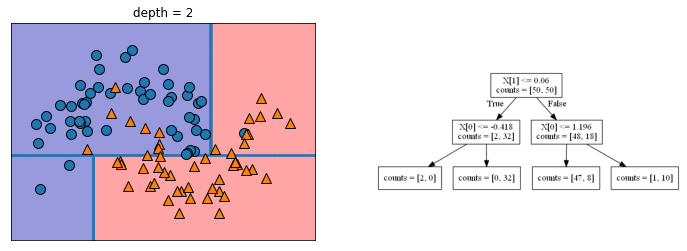

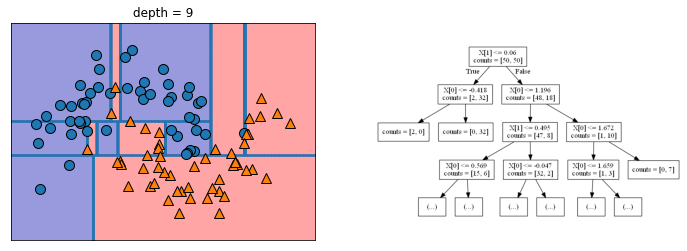

In [2]:
mglearn.plots.plot_tree_progressive()

### 결정 트리 복잡도 제어하기
- 일반적으로 모든 리프 노드가 순수 노드가 될 때까지 진행하면 모델이 매우 복잡해지고 훈련 데이터에 과대적합됨
- 순수 노드로 이루어진 결정 트리는 훈련 세트에 100% 정확하게 맞는다는 의미(훈련 세트의 모든 데이터 포인트는 정확한 클래스의 리프 노드에 있음)
- 맨 마지막의 왼쪽 그림이 과대적합을 나타냄
- 클래스 0으로 결정된 영역이 클래스 1에 속한 포인트들로 둘러쌓여 있음(또는 그 반대의 경우)
- 이는 바람직한 결정 경계의 모습이 아님, 결정 경계가 클래스의 포인트들에서 멀리 떨어진 이상치(outlier) 하나에 너무 민감하기 때문


- 과대적합을 막는 전략은 크게 두 가지
- 트리 생성을 일찍 중단하는 전략(사전 가지치기: pre-pruning)과
- 트리를 만든 후 데이터 포인트가 적은 노드를 삭제하거나 병합하는 전략(사후 가지치기: post-pruning 또는 그냥 가지치기:pruning)
- 사전 가지치기 방법은 트리의 최대 깊이나 리프의 최대 개수를 제한하거나, 또는 노드가 분할하기 위한 포인트의 최소 수를 지정하는 것
- scikit-learn 에서 결정 트리는 DecisionTreeRegressor 와 DecisionTreeClassifier 에 구현되어 있음
- scikit-learn 은 사전 가지치기만 지원
- 유방암 데이터셋을 이용한 사전 가지치기의 효과를 자세히 확인해 봄
- 우선 기본값 설정으로 완전한 트리(모든 리프 노드가 순수 노드가 될 때까지 생성한 트리) 모델을 만듬

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer=load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target, random_state=42)

tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


- 훈련 데이터의 모든 레이블을 완벽하게 기억할 만큼 충분히 깊게 만들어졌음  
- 테스트 세트의 정확도는 이전에 본 선형 모델에서의 정확도인 95% 보다 조금 낮음  
- 결정 트리의 깊이를 제한하지 않으면 트리는 무한정 깊어지고 복잡해질 수 있으므로 과대적합되기 쉽고 새로운 데이터에 잘 일반화되지 않음  
- 이제 사전 가지치기를 트리에 적용하여 훈련 데이터에 완전히 학습되기 전에 트리의 성장을 막아보겠음  
- 한 가지 방법은 일정 깊이에 도달하면 트리의 성장을 멈추게 하는 것  
- max_depth=4 옵션을 주면 연속된 질문을 최대 4개로 제한하게 됨  
- 트리 깊이를 제한하면 과대적합이 줄어듬  
- 훈련 세트의 정확도를 떨어뜨리지만 테스트 세트의 성능은 좋아짐

In [4]:
tree=DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [5]:
from sklearn.tree import export_graphviz

export_graphviz(tree,out_file="tree.dot", class_names=["malignant","benign"],feature_names=cancer.feature_names,impurity=False, filled=True)

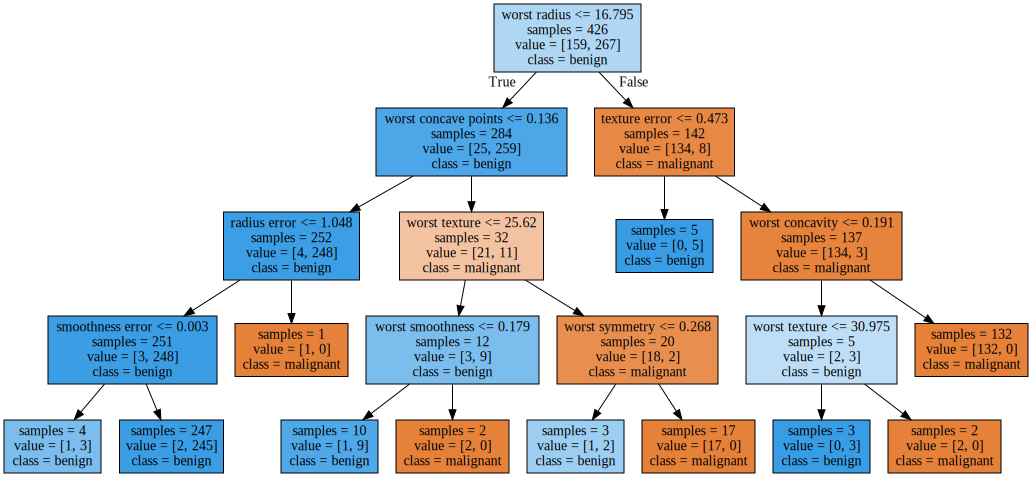

In [6]:
import graphviz

with open("tree.dot") as f:
    dot_graph=f.read()
    
graphviz.Source(dot_graph)

- 알고리즘의 예측이 어떻게 이루어지는지 이해하기 쉽지만 깊이가 4만 되어도 트리는 매우 커짐(트리가 더 깊어지면 한눈에 보기가 힘들어짐)  
- 트리를 조사할 때는 많은 수의 데이터가 흐르는 경로를 중심으로 보면 좋음

### 트리의 feature 중요도
- 전체 트리를 살펴보는 것은 어려울 수 있으니, 대신 트리가 어떻게 작동하는지 요약하는 속성들을 사용할 수 있음  
- 가장 널리 사용되는 속성은 트리를 만드는 결정에 각 feature 가 얼마나 중요한지를 평가하는 특성 중요도(feature importance) 임  
- 이 값은 0과 1 사이의 숫자로, 각 feature에 대해 0은 전혀 사용되지 않았다는 뜻이고 1은 완벽하게 target 클래스를 예측했다는 뜻임  
- 특성 중요도의 전체 합은 1

In [7]:
print("Feature importances:\n", tree.feature_importances_)

Feature importances:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


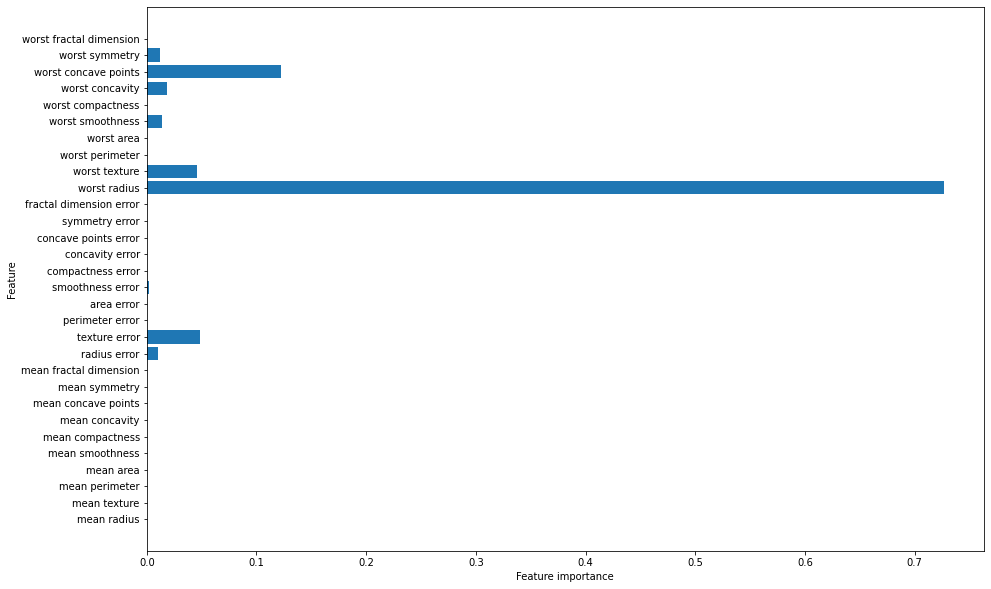

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importance_cancer(model):
    n_features=cancer.data.shape[1]
    plt.figure(figsize=(15,10))
    plt.barh(range(n_features),model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importance_cancer(tree)

- 첫 번째 노드에서 사용한 feature("worst_radius")가 가장 중요한 feature로 나타남
- 이 그래프는 첫 번째 노드에서 두 클래스를 꽤 잘 나누고 있다는 사실을 뒷받침
- 그러나 어떤 feature의 feature_importance 값이 낮다고 해서 이 feature가 유용하지 않다는 뜻은 아님
- 단지 트리가 그 feature 를 선택하지 않았을 뿐이며 다른 feature가 동일한 정보를 지니고 있어서일 수 있음
- 선형 모델의 계수와는 달리, 특성 중요도는 항상 양수이며 특성이 어떤 클래스를 지지하는지는 알 수 없음
- 즉 특성 중요도의 값은 "worst_radius" 가 중요하다고 알려주지만 높은 반지름이 양성을 의미하는지 악성을 의미하는지는 알 수 없음
- 사실 feature와 클래스 사이에는 간단하지 않은 관계가 있을 수 있음을 다음에서 살펴봄

Feature importances: [0. 1.]


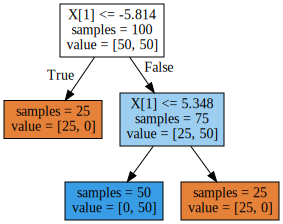

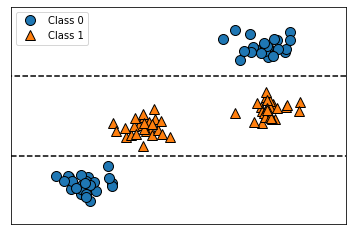

In [9]:
tree=mglearn.plots.plot_tree_not_monotone()
display(tree)

- X[1]에 있는 정보만 사용되었고 X[0]는 전혀 사용되지 않았음  
- 그리고 X[1]과 출력 클래스와의 관계가 단순하게 비례 또는 반비례하지 않음  

### 회귀 결정 트리
- DecisionTreeRegressor로 구현된 회귀 결정 트리에서도 위와 비슷하게 적용됨
- 회귀를 위한 트리 기반의 모델을 사용할 때 짚고 넘어가야 할 특별한 속성이 하나 있음
- DecisionTreeRegressor는 extrapolation 즉, 훈련 데이터 범위 밖의 포인트에 대해 예측을 할 수 없음
- 다음의 컴퓨터 메모리 가격 동향 데이터셋을 이용해 더 자세히 살펴봄
- x 축은 날짜, y 축은 해당 년도의 RAM 1 MB당 가격임

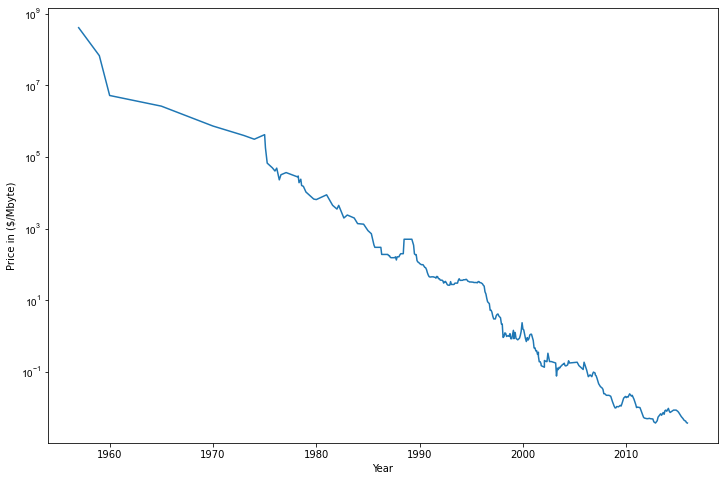

In [10]:
import os
import pandas as pd
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))
plt.figure(figsize=(12, 8))
plt.yticks(fontname = "Arial")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in ($/Mbyte)")
plt.show()

- y 축은 로그 스케일, 그래프를 로그 스케일로 그리면 약간의 굴곡을 제외하고는 선형적으로 나타나서 비교적 예측하기가 수월함  
- 날짜 feature 하나 만으로 2000년 전까지의 데이터로부터 2000년 후의 가격을 예측해 보겠음  
- 두 모델 DecisionTreeRegressor 과 LinearRegression 을 비교해 보겠음  
- 가격을 로그 스케일로 바꾸어도 DecisionTreeRegressor를 사용하는 데는 아무런 차이가 없음  
- 하지만 LinearRegression에는 큰 차이가 있음  
- 모델을 훈련 시키고 예측을 수행한 다음 로그 스케일을 되돌리기 위해 지수 함수를 적용함  
- 그래프 표현을 위해 전체 데이터셋에 대해 예측을 수행, 하지만 테스트 데이터셋과의 비교가 관심 대상임

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]
# 가격 예측을 위해 날짜 특성만을 이용합니다
X_train = data_train.date.to_numpy()[:, np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다
y_train = np.log(data_train.price)
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)
# 예측은 전체 기간에 대해서 수행합니다
X_all = ram_prices.date.to_numpy()[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)
# 예측한 값의 로그 스케일을 되돌립니다
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

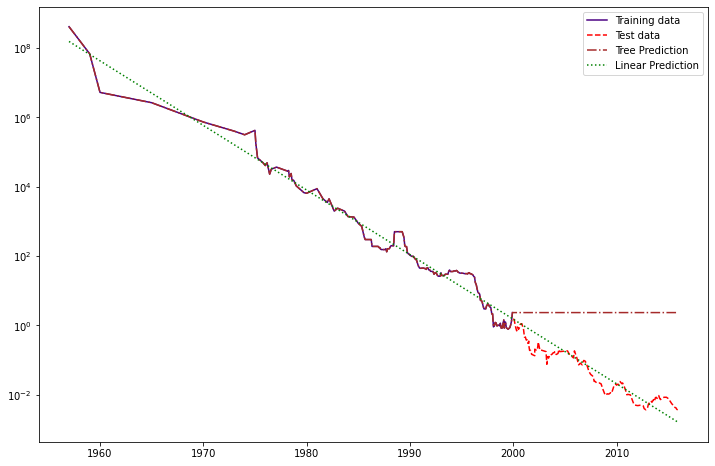

In [12]:
plt.figure(figsize=(12,8))
plt.semilogy(data_train.date, data_train.price, color='indigo', linestyle='-', label="Training data")
plt.semilogy(data_test.date, data_test.price, color='red', linestyle='--', label="Test data")
plt.semilogy(ram_prices.date, price_tree, color='brown', linestyle='-.', label="Tree Prediction")
plt.semilogy(ram_prices.date, price_lr, color='green', linestyle=':', label="Linear Prediction")
plt.legend()
plt.show()

In [13]:
#tree regression은 학습하지 않은 데이터에 관해서 예측 하지 못함 
#linear regression은 학습한 데이터를 바탕으로 예측을 할 수 있음 

- 트리 모델은 훈련 데이터를 완벽하게 예측함, 즉 트리의 복잡도에 제한을 두지 않아서 전체 데이터셋을 모두 기억하기 때문임  
- 그러나 모델이 가진 데이터 범위 밖으로 나가면 단순히 마지막 포인트를 이용해 예측하는게 전부  
- 트리 모델은 훈련 데이터 밖의 새로운 데이터를 예측할 능력이 없음, 모든 트리 기반 모델의 공통된 단점임

### 장단점과 매개변수
- 결정 트리에서 모델 복잡도를 조절하는 매개변수는 트리가 완전히 만들어지기 전에 멈추게 하는 사전 가지치기 매개변수임  
- max_depth, max_leaf_nodes, min_samples_leaf 중 하나만 지정해도 과대적합을 막는 데 충분함  
- 결정 트리가 이전에 소개한 다른 알고리즘보다 나은 점은 두 가지  
- 첫 째, 만들어진 모델을 쉽게 시각화할 수 있어서 비전문가도 이해하기 쉬움  
- 데이터의 스케일에 구애받지 않음, 각 feature가 개별적으로 처리되어 데이터를 분할하는데 데이터 스케일의 영향을 받지 않으므로 결정 트리에서는 feature의 정규화나 표준화 같은 전처리 과정이 필요 없음  
- 특히 feature의 스케일이 서로 다르거나 이진 특성과 연속적인 특성이 혼합되어 있을 때도 잘 작동함  
- 결정 트리의 주요 단점은 사전 가지치기를 사용함에도 불구하고 과대적합되는 경향이 있어 일반화 성능이 좋지 않음  
- 그래서 앙상블 방법을 단일 결정 트리의 대안으로 흔히 사용함  
- 앙상블은 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법임